# TP1
Name: You ZUO

Date: 24/09/2020

## Guitar tuner

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy import fftpack
from scipy.signal import find_peaks

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### visualisation in time domain
Before we transform our signals into frequency domain, we want to have a look of our sounds in time domain :

string_1.wav rate:44100, data size:(237568,)


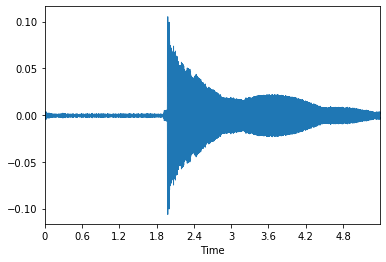

string_2.wav rate:22050, data size:(117912,)


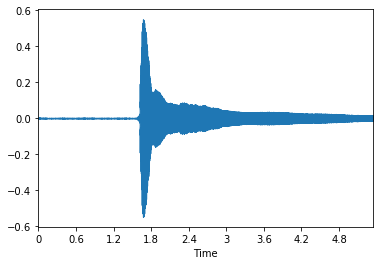

string_3.wav rate:22050, data size:(124344,)


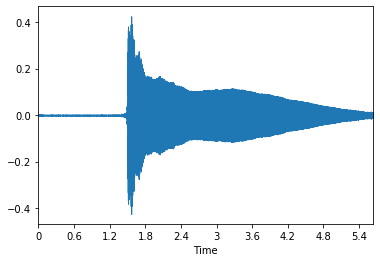

In [2]:
import librosa.display

def vis_in_time(file_path):
    data, rate = librosa.load(file_path, sr = None)
    print ("{0} rate:{1}, data size:{2}".format(file_path,rate,data.shape))  
    plt.figure()
    librosa.display.waveplot(data,rate)
    plt.show()

for sample in ["string_1.wav", "string_2.wav", "string_3.wav"]:
    vis_in_time(sample)

From the above, we can see that all of them has a duration about 5 seconds, and the sampling rate is 22050 times per second for string2 and string3, and 44100 times per second for string3.

### Fast Fourier Transform
By implementing the method of FFT, we get the Power Spectrum of three records in frenquency domain:

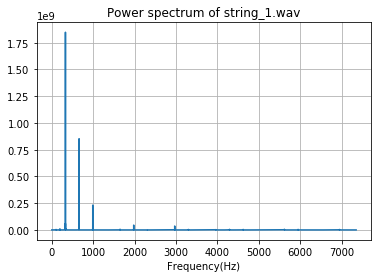

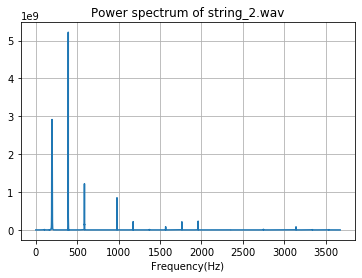

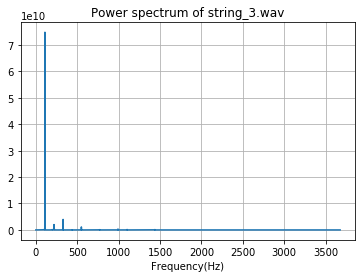

In [3]:
def spectral_analysis(file_path):
    rate, data = scipy.io.wavfile.read(file_path)
    N = len(data)
    T = 1.0/rate
    ps = np.abs(fftpack.fft(data))**2/N
    f = fftpack.fftfreq(N, T)
    plt.grid()
    plt.plot(f[:int(len(f)/6)], ps[:int(len(ps)/6)])    # I cut the xlim to see the distribution of frequenct more clearly. Besides, frequency higher than 4000 are normally less representive.
    plt.title('Power spectrum of {0}'.format(file_path))
    plt.xlabel('Frequency(Hz)')
    plt.show()
    return {'f': f, 'ps': ps}

fft_res = []
for sample in ["string_1.wav", "string_2.wav", "string_3.wav"]:
    fft_res.append(spectral_analysis(sample))


And now we are going to fugure out the played note for each record and its accuracy in cent. Firstly for guitar strings we have their corresponding frequencies :

In [4]:
strings = {"E1":329.63, "B2":246.94, "G3":196.00, "D4":146.83, "A5":110.00, "E6":82.41}   # unit: Hz

Then the accuracy for each string, which means an error within this range can be ignored.

In [5]:
cents_accuracy = {"E1":0.15, "B2":0.15, "G3":0.15, "D4":0.08, "A5":0.08, "E6":0.04}

In [35]:
def determine_string(fft=fft_res[0]):
    ps = fft['ps']
    f = fft['f']
    peaks, _ = find_peaks(ps)
    peak_values = [ps[peak] for peak in peaks]
    # Sort peaks use their heights
    sorted_peak_values = [[x, y] for x, y in sorted(zip(peaks, peak_values), key=lambda pair: pair[1], reverse=True)]
    top_peaks = sorted_peak_values[:25]
    for peak in [index for [index,value] in top_peaks]:
        for key in strings.keys():
            if(abs(strings[key]-f[peak])**2 < 0.5):
                return {'frequency': f[peak], 'key':key, 'accuracy': (f[peak] - strings[key])/cents_accuracy[key] }

In [36]:
for fft in fft_res:
    print(determine_string(fft))

{'frequency': 329.68076508620686, 'key': 'E1', 'accuracy': 0.3384339080457721}
{'frequency': 196.54106452269488, 'key': 'G3', 'accuracy': 3.6070968179658776}
{'frequency': 110.12232194557035, 'key': 'A5', 'accuracy': 1.5290243196293574}
